<a href="https://colab.research.google.com/github/chinu1997/Face-Emotion-Detection-App/blob/master/Chinmaya_Devprasad_Face_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing drive for access of dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Dataset**

In [100]:
image_data=pd.read_csv("/content/drive/MyDrive/Face Emotion Detection/fer2013.csv")

In [4]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [5]:
image_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


### **EDA With our Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


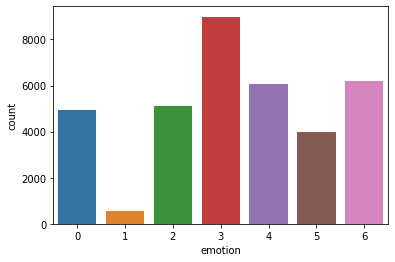

In [ ]:
label=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
sns.countplot(image_data['emotion'],)


In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
image_data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

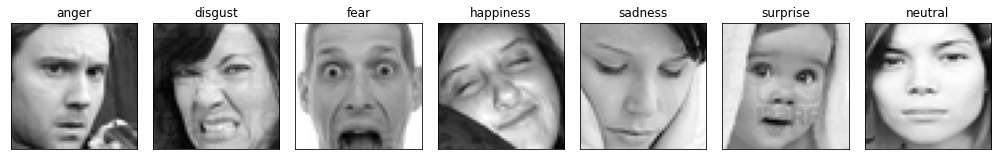

In [ ]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(image_data.emotion.unique()):
    for j in range(1):
        px = image_data[image_data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px , cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [ ]:
image_data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [6]:
# Scale our image for fit our dataset
def parse_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row,'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48, 1))
        image_array[i] = image
        
    return image_array, image_label

# Splitting the data into train, validation and testing set thanks to Usage column
train_imgs, train_lbls = parse_data(image_data[image_data["Usage"] == "Training"])
val_imgs, val_lbls = parse_data(image_data[image_data["Usage"] == "PrivateTest"])
test_imgs, test_lbls = parse_data(image_data[image_data["Usage"] == "PublicTest"])

In [7]:
print("train shape", np.shape(train_imgs))
print("validation shape", np.shape(val_imgs))
print("validation shape", np.shape(val_imgs))

train shape (28709, 48, 48, 1)
validation shape (3589, 48, 48, 1)
validation shape (3589, 48, 48, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import models, layers

In [ ]:
# Building MLP Model
model_mlp = keras.Sequential()

model_mlp.add(layers.Flatten(input_shape=(48, 48, 1)))

model_mlp.add(layers.Dense(units=120, activation='relu'))

model_mlp.add(layers.Dense(units=84, activation='relu'))

model_mlp.add(layers.Dense(units=7, activation = 'softmax'))

model_mlp.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['accuracy'])

model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               276600    
_________________________________________________________________
dense_4 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 595       
Total params: 287,359
Trainable params: 287,359
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mlp.fit(train_imgs, train_lbls,epochs=5, batch_size=32,validation_data=(val_imgs, val_lbls), verbose=1)

Epoch 1/5
898/898 [==============================] - 4s 4ms/step - loss: 47.1633 - accuracy: 0.2087 - val_loss: 2.3757 - val_accuracy: 0.2282
Epoch 2/5
898/898 [==============================] - 3s 4ms/step - loss: 1.9894 - accuracy: 0.2493 - val_loss: 2.1619 - val_accuracy: 0.1828
Epoch 3/5
898/898 [==============================] - 3s 4ms/step - loss: 1.8900 - accuracy: 0.2655 - val_loss: 2.6126 - val_accuracy: 0.1167
Epoch 4/5
898/898 [==============================] - 3s 4ms/step - loss: 1.8567 - accuracy: 0.2327 - val_loss: 1.8168 - val_accuracy: 0.2449
Epoch 5/5
898/898 [==============================] - 3s 4ms/step - loss: 1.8110 - accuracy: 0.2486 - val_loss: 1.8177 - val_accuracy: 0.2449


In [ ]:
class_test=model_mlp.predict_classes(test_imgs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
accuracy_score(test_lbls,class_test)*100

24.965171356923936

In [75]:
# using tensor flow version 2.4.1
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf


In [ ]:
# Using cnn model
model_cnn = keras.Sequential()

model_cnn.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

model_cnn.add(layers.MaxPooling2D())

model_cnn.add(layers.Flatten())

model_cnn.add(layers.Dense(units=84, activation='relu'))

model_cnn.add(layers.Dense(units=7, activation = 'softmax'))

model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['accuracy'])

In [ ]:
model_cnn.fit(train_imgs, train_lbls,epochs=15, batch_size=42,validation_data=(val_imgs, val_lbls), verbose=1)

Epoch 1/15
684/684 [==============================] - 56s 82ms/step - loss: 0.6443 - accuracy: 0.7727 - val_loss: 3.1014 - val_accuracy: 0.4260
Epoch 2/15
684/684 [==============================] - 56s 81ms/step - loss: 0.5620 - accuracy: 0.8021 - val_loss: 3.4424 - val_accuracy: 0.3954
Epoch 3/15
684/684 [==============================] - 56s 81ms/step - loss: 0.5157 - accuracy: 0.8240 - val_loss: 3.6780 - val_accuracy: 0.4124
Epoch 4/15
684/684 [==============================] - 56s 82ms/step - loss: 0.4715 - accuracy: 0.8365 - val_loss: 4.1690 - val_accuracy: 0.4154
Epoch 5/15
684/684 [==============================] - 56s 82ms/step - loss: 0.4663 - accuracy: 0.8418 - val_loss: 4.1743 - val_accuracy: 0.4118
Epoch 6/15
684/684 [==============================] - 56s 82ms/step - loss: 0.4277 - accuracy: 0.8535 - val_loss: 4.6127 - val_accuracy: 0.3996
Epoch 7/15
684/684 [==============================] - 56s 82ms/step - loss: 0.3749 - accuracy: 0.8723 - val_loss: 4.8611 - val_accuracy:

In [ ]:
test_cnn=model_cnn.predict_classes(test_imgs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score

# ***Resnet Model ***

In [115]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import keras

In [112]:
resnet=image_data[image_data['Usage']=='Training']['pixels']

In [114]:
a = []
for i in range(len(resnet)):
            image_string = (resnet)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
            a.append(image_data)

resnet = np.array(a)
rgb_X_train = np.repeat(resnet[..., np.newaxis], 3, -1)
print(rgb_X_train.shape)

(28709, 48, 48, 3)


In [ ]:
model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

x = model1.output
x= Flatten()(x)
x = Dense(7, activation='softmax')(x)
model50 = Model(inputs=model1.input, outputs=x)

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model50.fit(rgb_X_train,train_lbls, batch_size=42, epochs=1200, validation_split = 0.25)